In [61]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [5]:
person_dict = dict()

with open("user_informations.csv", "r") as f:
    r = csv.reader(f)
    for R in r:
        person_dict[R[2]] = {
            "age": R[0],
            "sex": R[1]
        }

information_count = dict()
for V in person_dict.values():
    try:
        information_count[f"{V['age']}_{V['sex']}"] += 1
    except:
        information_count[f"{V['age']}_{V['sex']}"] = 1

information_count

{'70_female': 1, '10_male': 25, '10_female': 2}

In [30]:
vote_dict = dict()

with open("vote_results.csv", "r") as f:
    r = csv.reader(f)
    for R in r:
        if len(R) == 8:
            vote_dict[f'{R[7]}_{R[3]}'] = {
                "method": R[3],
                "vote": int(R[2]),
                "star": int(R[6])
            }
        else:
            continue
            vote_dict[f'{R[6]}_{R[3]}'] = {
                "method": R[3],
                "vote": int(R[2])
            }
            print(R)

len(vote_dict)

220

In [34]:
vote_count_dict = dict()

for V in vote_dict.values():
    method = V["method"]
    vote = V["vote"]

    try:
        vote_count_dict[method][vote] += 1
    except:
        vote_count_dict[method] = {
            0: 0, 1: 0, 2: 0, 3: 0
        }
        vote_count_dict[method][vote] += 1

vote_count_dict

{'GUMI_AMAE_100.0': {0: 3, 1: 4, 2: 6, 3: 7},
 'caption': {0: 15, 1: 2, 2: 4, 3: 0},
 'llama': {0: 9, 1: 5, 2: 7, 3: 2},
 'Neural_Joking_Machine': {0: 9, 1: 6, 2: 3, 3: 0},
 'GUMI_T_3': {0: 3, 1: 4, 2: 6, 3: 3},
 'GUMI_AMAE_1.0': {0: 2, 1: 9, 2: 7, 3: 4},
 'GUMI_AMAE_10.0': {0: 7, 1: 4, 2: 3, 3: 2},
 'human': {0: 3, 1: 5, 2: 10, 3: 6},
 'GUMI_AMAE_10000.0': {0: 6, 1: 3, 2: 6, 3: 3},
 'GUMI_AMAE_1000.0': {0: 9, 1: 4, 2: 7, 3: 1},
 'GUMI_AE': {0: 7, 1: 7, 2: 4, 3: 3}}

In [38]:
vote_count_dict_percentage = dict()

for K, V in vote_count_dict.items():
    percentage_vote = {
        KK: VV / sum(V.values()) for KK, VV in V.items()
    }
    vote_count_dict_percentage[K] = percentage_vote

vote_count_dict_percentage

{'GUMI_AMAE_100.0': {0: 0.15, 1: 0.2, 2: 0.3, 3: 0.35},
 'caption': {0: 0.7142857142857143,
  1: 0.09523809523809523,
  2: 0.19047619047619047,
  3: 0.0},
 'llama': {0: 0.391304347826087,
  1: 0.21739130434782608,
  2: 0.30434782608695654,
  3: 0.08695652173913043},
 'Neural_Joking_Machine': {0: 0.5,
  1: 0.3333333333333333,
  2: 0.16666666666666666,
  3: 0.0},
 'GUMI_T_3': {0: 0.1875, 1: 0.25, 2: 0.375, 3: 0.1875},
 'GUMI_AMAE_1.0': {0: 0.09090909090909091,
  1: 0.4090909090909091,
  2: 0.3181818181818182,
  3: 0.18181818181818182},
 'GUMI_AMAE_10.0': {0: 0.4375, 1: 0.25, 2: 0.1875, 3: 0.125},
 'human': {0: 0.125, 1: 0.20833333333333334, 2: 0.4166666666666667, 3: 0.25},
 'GUMI_AMAE_10000.0': {0: 0.3333333333333333,
  1: 0.16666666666666666,
  2: 0.3333333333333333,
  3: 0.16666666666666666},
 'GUMI_AMAE_1000.0': {0: 0.42857142857142855,
  1: 0.19047619047619047,
  2: 0.3333333333333333,
  3: 0.047619047619047616},
 'GUMI_AE': {0: 0.3333333333333333,
  1: 0.3333333333333333,
  2: 0.190

In [48]:
sorted_keys = [
    "caption",
    "Neural_Joking_Machine",
    "GUMI_AE",
    "llama",
    "GUMI_AMAE_1.0",
    "GUMI_AMAE_10.0",
    "GUMI_AMAE_100.0",
    "GUMI_AMAE_1000.0",
    "GUMI_AMAE_10000.0",
    "GUMI_T_3",
    "human"
]
a = {K: vote_count_dict_percentage[K] for K in sorted_keys}

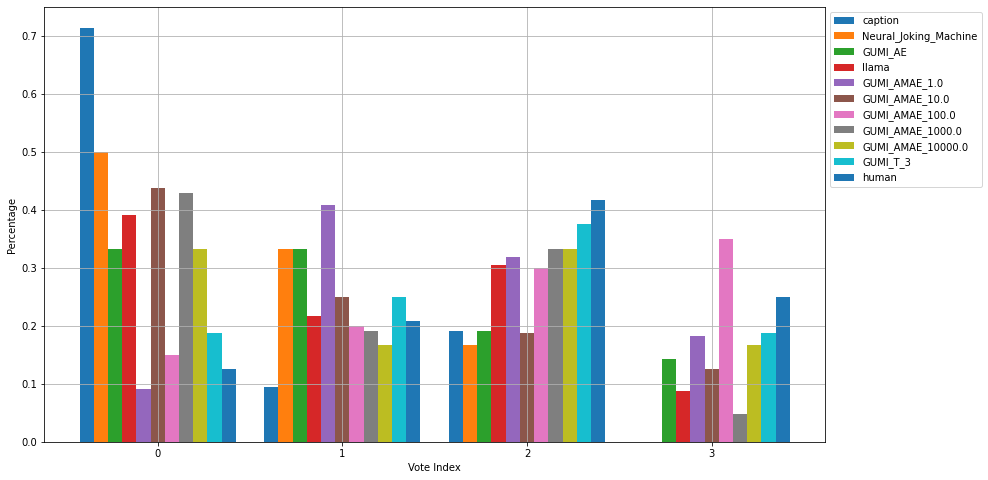

In [56]:
categories = list(a.keys())
indices = list(a[categories[0]].keys())  # インデックス: [0, 1, 2, 3]
width = 0.1  # 各棒の幅
gap = 0.2  # 各項目間の空白幅

# X軸位置
x = np.arange(len(indices)) * (width * len(categories) + gap)

# グラフ描画
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()
for i, category in enumerate(categories):
    values = [a[category][idx] for idx in indices]  # 各カテゴリの値
    ax.bar(x + i * width, values, width, label=category)

# 軸ラベルとタイトル
ax.set_xlabel('Vote Index')
ax.set_ylabel('Percentage')
# ax.set_title('Bar Graph for Each Category with Gaps')
ax.set_xticks(x + width * (len(categories) - 1) / 2, indices)  # X軸ラベルの位置調整
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()

In [54]:
b = {
    K: {0: V[0] + V[1], 1: V[2] + V[3]} for K, V in a.items()
}

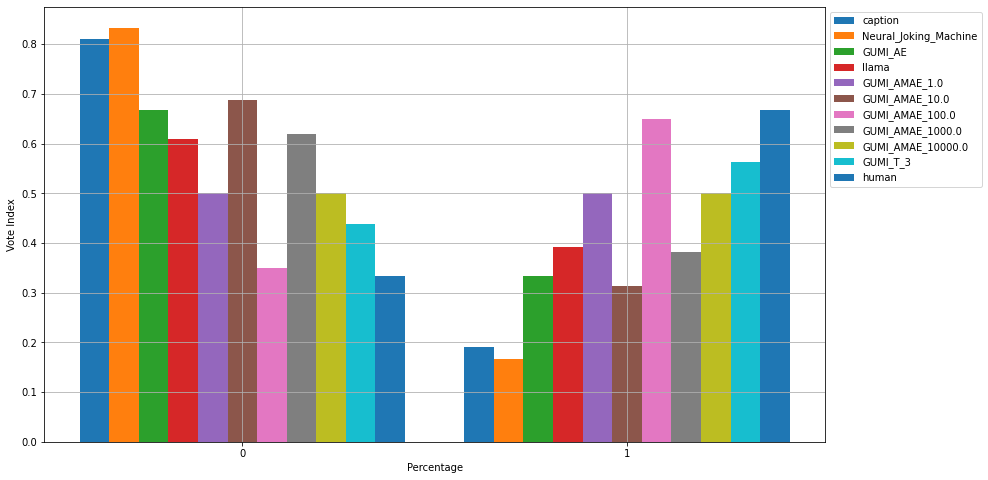

In [58]:
categories = list(b.keys())
indices = list(b[categories[0]].keys())  # インデックス: [0, 1, 2, 3]
width = 0.1  # 各棒の幅
gap = 0.2  # 各項目間の空白幅

# X軸位置
x = np.arange(len(indices)) * (width * len(categories) + gap)

# グラフ描画
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()
for i, category in enumerate(categories):
    values = [b[category][idx] for idx in indices]  # 各カテゴリの値
    ax.bar(x + i * width, values, width, label = category)

# 軸ラベルとタイトル
ax.set_xlabel('Percentage')
ax.set_ylabel('Vote Index')
ax.set_xticks(x + width * (len(categories) - 1) / 2, indices)  # X軸ラベルの位置調整
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()

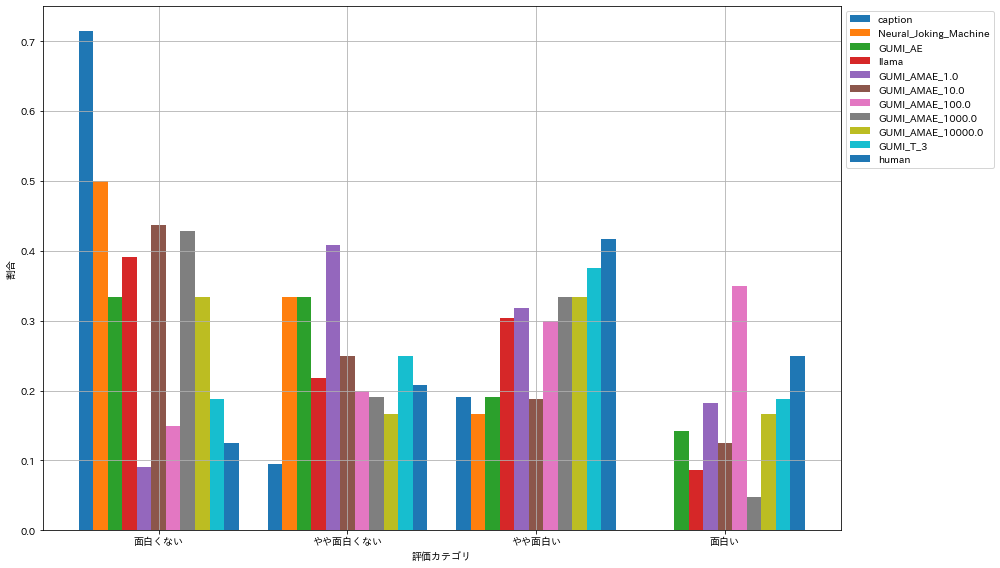

In [62]:
categories = list(a.keys())
indices = list(a[categories[0]].keys())  # インデックス: [0, 1, 2, 3]
labels = ['面白くない', 'やや面白くない', 'やや面白い', '面白い']  # 新しいX軸ラベル
width = 0.1  # 各棒の幅
gap = 0.2  # 各項目間の空白幅

# X軸位置
x = np.arange(len(indices)) * (width * len(categories) + gap)

# グラフ描画
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()
for i, category in enumerate(categories):
    values = [a[category][idx] for idx in indices]  # 各カテゴリの値
    ax.bar(x + i * width, values, width, label=category)

# 軸ラベルとタイトル
ax.set_xlabel('評価カテゴリ')
ax.set_ylabel('割合')
ax.set_xticks(x + width * (len(categories) - 1) / 2)  # X軸ラベルの位置調整
ax.set_xticklabels(labels)  # X軸のラベルを変更
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()

# グラフ表示
plt.tight_layout()
plt.show()

In [63]:
b = {
    K: {0: V[0] + V[1], 1: V[2] + V[3]} for K, V in a.items()
}

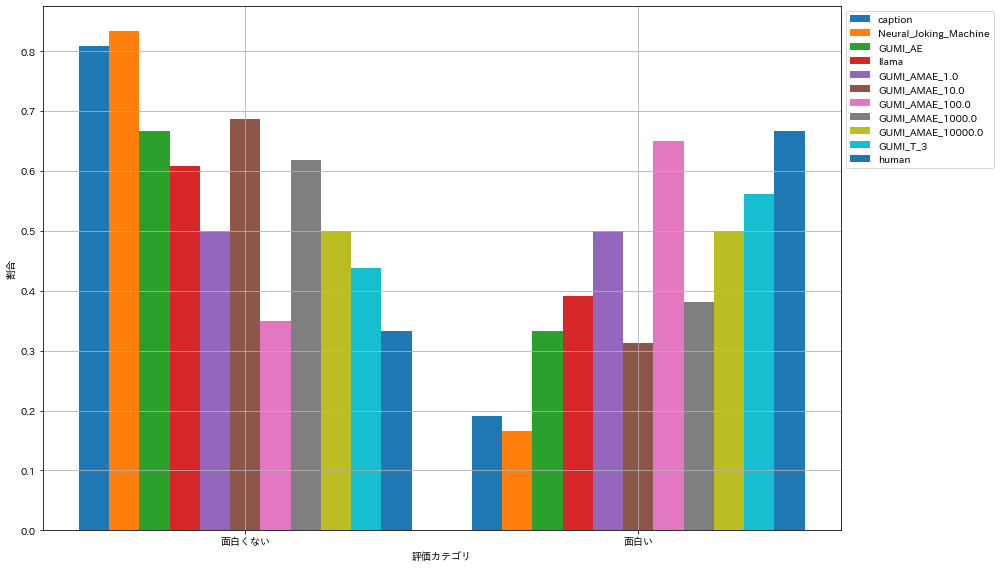

In [65]:
categories = list(b.keys())
indices = list(b[categories[0]].keys())  # インデックス: [0, 1, 2, 3]
labels = ['面白くない', '面白い']  # 新しいX軸ラベル
width = 0.1  # 各棒の幅
gap = 0.2  # 各項目間の空白幅

# X軸位置
x = np.arange(len(indices)) * (width * len(categories) + gap)

# グラフ描画
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()
for i, category in enumerate(categories):
    values = [b[category][idx] for idx in indices]  # 各カテゴリの値
    ax.bar(x + i * width, values, width, label=category)

# 軸ラベルとタイトル
ax.set_xlabel('評価カテゴリ')
ax.set_ylabel('割合')
ax.set_xticks(x + width * (len(categories) - 1) / 2)  # X軸ラベルの位置調整
ax.set_xticklabels(labels)  # X軸のラベルを変更
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()

# グラフ表示
plt.tight_layout()
plt.show()